In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    'figure.figsize' : (8, 5),
    "font.sans-serif": ["Helvetica"],
    "figure.dpi": 150})

from scipy.optimize import curve_fit
from scipy.optimize import minimize_scalar

In [102]:
dataFiles = glob.glob("dati/result*.csv")

In [103]:
def poly(x, a, b, c, d, e):
    return e + d*x + c*x**2 + b*x**3 + a*x**4

In [124]:

#file = dataFiles[5]

rhoVals = []
Emin = []
bmin = []

for file in dataFiles:
    data = pd.read_csv(file, names = ["b","eloc","eloc2","std","std2", "acc"], sep = " ", index_col = False)
    #data.head(6)
    rho = float(file.split("rho")[1].split(".csv")[0])

    if(len(data) > 0):
        rhoVals.append(rho)
        
        coef, pcov = curve_fit(poly, data["b"], data["eloc"])
        b_a = np.linspace(min(data["b"]) , max(data["b"]), 110)
        Epoli = poly(b_a, coef[0], coef[1], coef[2], coef[3], coef[4])

        f = np.poly1d(coef)
        result = minimize_scalar(f, bounds=(min(data["b"]) , max(data["b"])), method='bounded')
        minval =result.x
        
        bmin.append(minval)
        Emin.append(f(minval))
        print(f'rho = {rho} \nb_min = {minval} \nE_min = {f(minval)}\n')

rho = 22.297 
b_min = 1.1706335220643953 
E_min = -12.094574565496373

rho = 23.609 
b_min = 1.1689767752188243 
E_min = -10.611906227677537

rho = 23.172 
b_min = 1.1672373056556629 
E_min = -11.288239416608121

rho = 21.86 
b_min = 1.1722029744509572 
E_min = -12.612203397878147

rho = 20.767 
b_min = 1.1652934082371709 
E_min = -13.302131582913717

rho = 20.548 
b_min = 1.165324482138122 
E_min = -13.619126322293596

rho = 22.734 
b_min = 1.171562768758454 
E_min = -11.767617074185637

rho = 19.674 
b_min = 1.1625628524256724 
E_min = -14.033611331204156



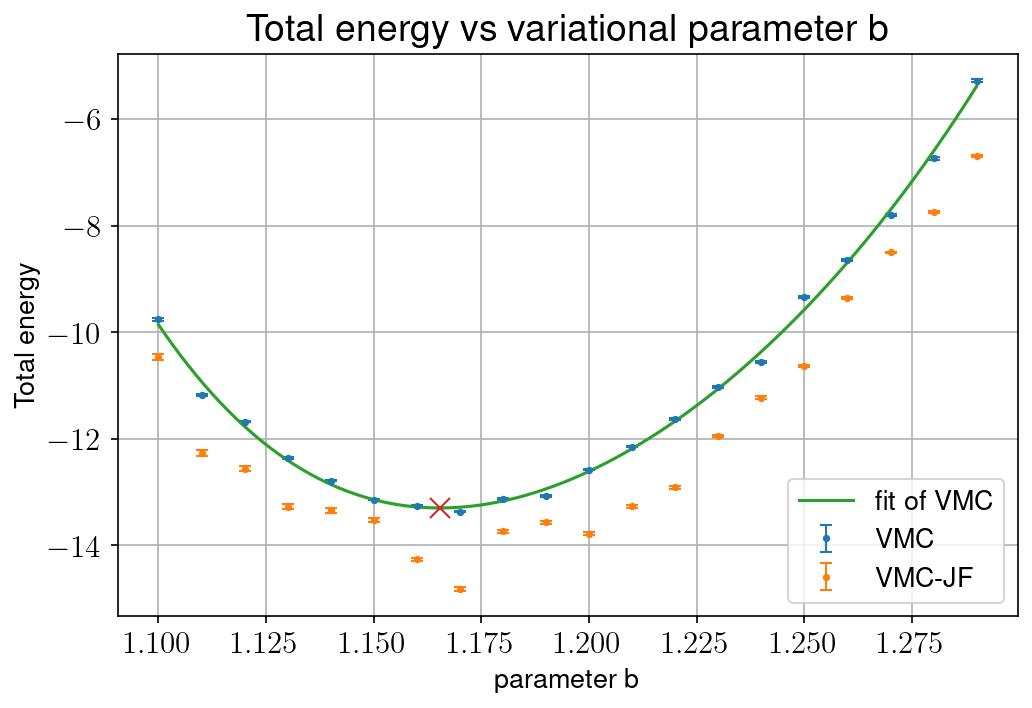

In [125]:
file = dataFiles[5]
data = pd.read_csv(file, names = ["b","eloc","eloc2","std","std2", "acc"], sep = " ", index_col = False)

coef, pcov = curve_fit(poly, data["b"], data["eloc"])
b_a = np.linspace(min(data["b"]) , max(data["b"]), 110)
Epoli = poly(b_a, coef[0], coef[1], coef[2], coef[3], coef[4])

f = np.poly1d(coef)
result = minimize_scalar(f, bounds=(min(data["b"]) , max(data["b"])), method='bounded')
minval =result.x

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
fig = plt.figure(facecolor=(1, 1, 1))
ax = fig.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1

ax.errorbar(data["b"], data["eloc"], data["std"], markersize = 5, fmt=".", linewidth = 1, capsize = 3, label="VMC ")
ax.errorbar(data["b"], data["eloc2"], data["std2"], markersize = 5, fmt=".", linewidth = 1, capsize = 3, label="VMC-JF")
#ax.plot(data["b"], data["eloc2"], ".", label="numerical values2")
ax.plot(b_a, Epoli, label="fit of VMC")
ax.plot(minval,f(minval), "x", markersize = 10)

ax.set_title("Total energy vs variational parameter b", fontsize=18)
ax.set_xlabel("parameter b", fontsize=13)
ax.set_ylabel("Total energy", fontsize=13)
ax.grid(which = "both", axis = 'both')
ax.legend(fontsize = 13, loc = "lower right")

#plt.savefig("plot/" + title + ".png", bbox_inches='tight', dpi=150)
plt.show()

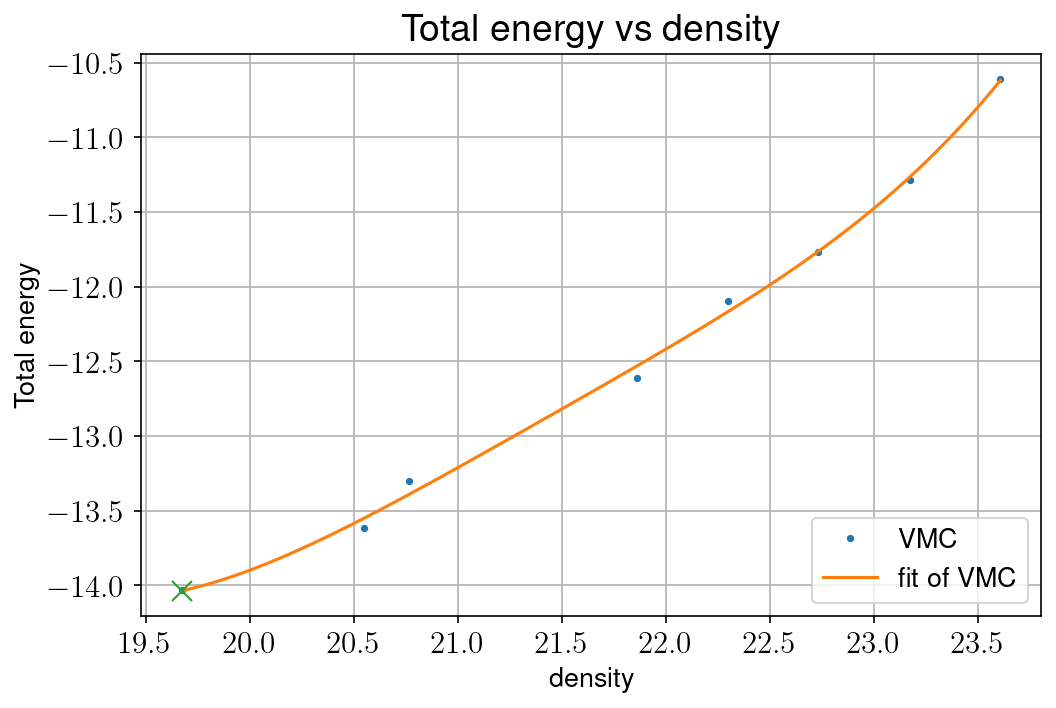

In [137]:

coef, pcov = curve_fit(poly, rhoVals, Emin)
rho_a = np.linspace(min(rhoVals) , max(rhoVals), 110)
Epoli = poly(rho_a, *coef)

f = np.poly1d(coef)
result = minimize_scalar(f, bounds=(min(rhoVals) , max(rhoVals)), method='bounded')
minval =result.x

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
fig = plt.figure(facecolor=(1, 1, 1))
ax = fig.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1

ax.plot(rhoVals, Emin, ".", markersize = 5, linewidth = 1, label="VMC ")
ax.plot(rho_a, Epoli, label="fit of VMC")
ax.plot(minval,f(minval), "x", markersize = 10)

ax.set_title("Total energy vs density", fontsize=18)
ax.set_xlabel("density", fontsize=13)
ax.set_ylabel("Total energy", fontsize=13)
ax.grid(which = "both", axis = 'both')
ax.legend(fontsize = 13, loc = "lower right")

#plt.savefig("plot/" + title + ".png", bbox_inches='tight', dpi=150)
plt.show()